<a href="https://colab.research.google.com/github/adgadiwan09/Week-3-NLP_basics/blob/master/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_table('spam.tsv')
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [7]:
print(df.shape)
print(df.size)

(5572, 4)
22288


In [8]:
df.head(2)

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [10]:
df.columns

Index(['label', 'message', 'length', 'punct'], dtype='object')

In [18]:
op= df.iloc[:,0].values
op

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

In [0]:
np.unique?

In [0]:
unique_value,count=np.unique(op, return_index=False, return_inverse=False, return_counts=True, axis=None)

In [23]:
print(unique_value)
print(count)

['ham' 'spam']
[4825  747]


In [24]:
print(f'You have {count[0]} ham messages')

You have 4825 ham messages


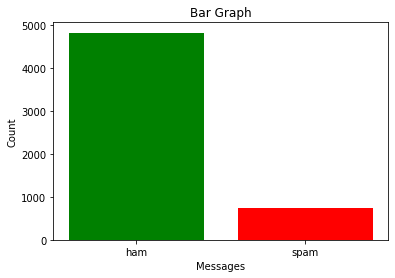

In [29]:
import matplotlib.pyplot as plt
plt.bar(unique_value,count,color=['g','r'])
plt.xlabel('Messages')
plt.ylabel('Count')
plt.title('Bar Graph')
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


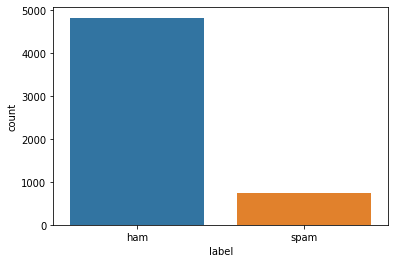

In [30]:
import seaborn as sns
sns.countplot(df['label'])

Groupby basics

In [32]:
df_string = df.copy()
df_string = df_string.drop(columns= ['length','punct'])
df_string.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [33]:
gk = df_string.groupby('label')
gk.first()

,message
label,
ham,"Go until jurong point, crazy.. Available only ..."
spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [34]:
sp = gk.get_group('spam')
type(sp)

pandas.core.frame.DataFrame

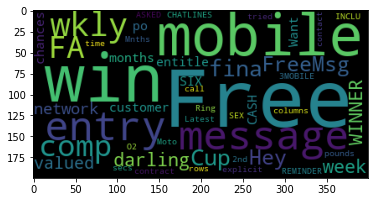

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc= WordCloud()
wc.generate(str(sp))
plt.imshow(wc)

In [36]:
hp = gk.get_group('ham')
type(hp)

pandas.core.frame.DataFrame

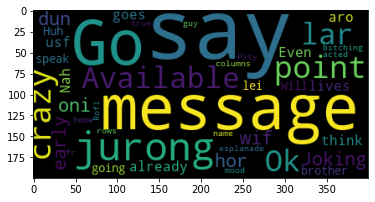

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc= WordCloud()
wc.generate(str(hp))
plt.imshow(wc)